In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
dataset = pd.read_csv("position_salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [82]:
dataset.drop(columns=["Position"], inplace = True)
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


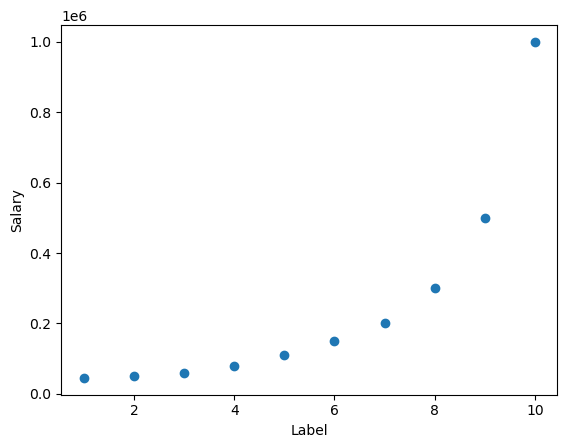

In [83]:
plt.scatter(dataset["Level"], dataset["Salary"])
plt.xlabel("Label")
plt.ylabel("Salary")
plt.show()

This shows the relation is not linear

In [84]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [85]:
x = dataset[["Level"]]
y = dataset["Salary"]

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [87]:
pf = PolynomialFeatures(degree = 2) # how many degrees, x^2, x^3...
pf.fit(x)
x = pf.transform(x)

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [90]:
lr.score(x_test, y_test) *100

76.66492889299907

In [91]:
prd = lr.predict(x)

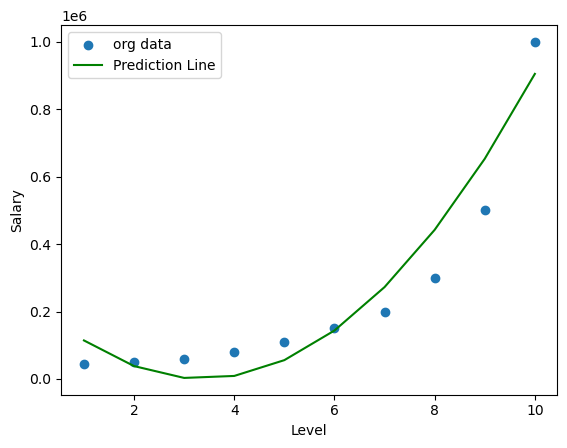

In [92]:
plt.scatter(dataset["Level"], dataset["Salary"])
plt.plot(dataset["Level"], prd, c="green")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend(["org data", "Prediction Line"])
plt.show()

In [93]:
lr.coef_

array([      0.        , -137634.60994912,   20502.04918033])

For any new data that would be added later, we would have to transform it and then predict. EG:

In [94]:
test = pf.transform([[45]])
test

/opt/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 4.500e+01, 2.025e+03]])

In [95]:
lr.predict(test)

array([35554380.65291124])

Make sure not to try to make the data too perfect as that might overfit the data. Also do not underfit